<a href="https://colab.research.google.com/github/khj0917000/khj0917/blob/master/11%EC%9B%94_12%EC%9D%BC_%EC%A4%91%EA%B3%A0%EC%B0%A8%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime as dt
import seaborn as sns

In [ ]:
cars=pd.read_csv('/content/sample_data/cars.csv')
brand=pd.read_csv('//content/sample_data/brand.csv')

In [ ]:
# 각 파일의 대문자/소문자 상태 확인
print("cars.csv 예시:", cars['title'].head(5).tolist())
print("brand.csv 예시:", brand['title'].head(5).tolist())

cars.csv 예시: ['SKODA FABIA', 'VAUXHALL CORSA', 'HYUNDAI I30', 'MINI HATCH', 'VAUXHALL CORSA']
brand.csv 예시: ['skoda', 'vauxhall', 'hyundai', 'mini', 'ford']


In [ ]:
# 대소문자 통일
cars['title'] = df1['title'].str.lower()
brand['title'] = df2['title'].str.lower()

# cars에서 브랜드명(첫 단어)만 추출
cars['brand'] = cars['title'].str.split().str[0]

# brand.csv의 컬럼 이름을 동일하게 맞추기
brand.rename(columns={'title': 'brand'}, inplace=True)

# 두 데이터 병합
merged = pd.merge(cars, brand, on='brand', how='left')

# 결과 확인
print(merged[['title', 'brand', 'country']].head(10))


            title     brand         country
0     skoda fabia     skoda  Czech Republic
1  vauxhall corsa  vauxhall  United Kingdom
2     hyundai i30   hyundai     South Korea
3      mini hatch      mini  United Kingdom
4  vauxhall corsa  vauxhall  United Kingdom
5   hyundai coupe   hyundai     South Korea
6      ford focus      ford   United States
7  vauxhall corsa  vauxhall  United Kingdom
8       volvo 740     volvo          Sweden
9     peugeot 207   peugeot          France


In [ ]:
#결측치 개수확인
print(merged.isna().sum())


title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3147
brand                   0
country                 0
dtype: int64


In [ ]:
#결측치 비율% 확인(소수점2자리)
print((merged.isna().mean() * 100).round(2))

title                 0.00
Price                 0.00
Mileage(miles)        0.00
Registration_Year     0.00
Previous Owners      38.27
Fuel type             0.00
Body type             0.00
Engine                1.22
Gearbox               0.00
Doors                 0.68
Seats                 0.95
Emission Class        2.36
Service history      85.35
brand                 0.00
country               0.00
dtype: float64


In [ ]:
#결측치 포함 행만 보기
print(merged[merged.isna().any(axis=1)].head())

            title  Price  Mileage(miles)  Registration_Year  Previous Owners  \
0     skoda fabia   6900           70189               2016              3.0   
2     hyundai i30    949          137000               2011              NaN   
4  vauxhall corsa   1000           85000               2013              NaN   
5   hyundai coupe    800          124196               2007              3.0   
6      ford focus    798          140599               2008              NaN   

  Fuel type  Body type Engine Gearbox  Doors  Seats Emission Class  \
0    Diesel  Hatchback   1.4L  Manual    5.0    5.0         Euro 6   
2    Petrol  Hatchback   1.4L  Manual    5.0    5.0         Euro 5   
4    Diesel  Hatchback   1.3L  Manual    5.0    5.0         Euro 5   
5    Petrol      Coupe   2.0L  Manual    3.0    4.0         Euro 4   
6    Petrol  Hatchback   1.6L  Manual    5.0    5.0         Euro 4   

  Service history     brand         country  
0             NaN     skoda  Czech Republic  
2     

In [ ]:
# 1) 문자열형/범주형 데이터의 결측치 채우기
# 'Service history'는 문자열/범주형이므로 'Unknown'으로 채우는 것이 적절합니다.
merged['Service history'] = merged['Service history'].fillna('Unknown')
# 'Engine'은 '1.4L'과 같은 형태이므로 문자열/범주형으로 간주하고 최빈값으로 채웁니다.
merged['Engine'] = merged['Engine'].fillna(merged['Engine'].mode()[0])
# 'Emission Class'는 범주형이므로 최빈값으로 채웁니다.
merged['Emission Class'] = merged['Emission Class'].fillna(merged['Emission Class'].mode()[0])

# 2) 숫자형 데이터의 결측치 채우기
# 'Doors'는 숫자형이므로 최빈값으로 채웁니다.
merged['Doors'] = merged['Doors'].fillna(merged['Doors'].mode()[0])
# 'Previous Owners'는 숫자형이므로 평균으로 채웁니다.
merged['Previous Owners'] = merged['Previous Owners'].fillna(merged['Previous Owners'].mean())
# 'Seats'는 숫자형이므로 최빈값으로 채웁니다.
merged['Seats'] = merged['Seats'].fillna(merged['Seats'].mode()[0])

# 3) 병합으로 생긴 'country' 결측치는 'Unknown'으로 표시
# (현재 데이터에서는 country에 결측치가 없지만, 방어적인 코드로 유지합니다.)
merged['country'] = merged['country'].fillna('Unknown')

print(merged.isna().sum())

title                0
Price                0
Mileage(miles)       0
Registration_Year    0
Previous Owners      0
Fuel type            0
Body type            0
Engine               0
Gearbox              0
Doors                0
Seats                0
Emission Class       0
Service history      0
brand                0
country              0
dtype: int64


In [ ]:
# 제일 이해안되는 부분!!!
# 이상치 처리 (아주 쉬운 IQR-윈저화: 하한/상한으로 자르기)
num_cols = merged.select_dtypes(include="number").columns
q1 = merged[num_cols].quantile(0.25)
q3 = merged[num_cols].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr


In [ ]:
merged[num_cols] = merged[num_cols].clip(lower=lower, upper=upper, axis=1)

In [ ]:
merged.to_csv("cleaned_data.csv", index=False)

print("✅ 데이터 전처리 완료! → cleaned_data.csv 로 저장됨")

✅ 데이터 전처리 완료! → cleaned_data.csv 로 저장됨


In [ ]:
#상관관계(변수끼리 관계가 가장 높은지 확인)
#.corr().unstack().sort_values()
#(상관관계 높은 변수 쌍을 빠르게 찾는 핵심 코드)
corr = merged.corr(numeric_only=True)

#행렬을 1차원으로 펼치고, 큰 값 순으로 정렬
corr_pairs = corr.unstack().sort_values(ascending=False)

#자기 자신(상관계수 1.0) 제외하고 상위 5개만 보기
high_corr = corr_pairs[(corr_pairs < 0.9999) & (corr_pairs > -0.9999)].head(5)

print("상관관계가 높은 변수 쌍 Top 5:")
print(high_corr)

상관관계가 높은 변수 쌍 Top 5:
Registration_Year  Price                0.779658
Price              Registration_Year    0.779658
Mileage(miles)     Previous Owners      0.286734
Previous Owners    Mileage(miles)       0.286734
Registration_Year  Doors                0.218668
dtype: float64


<Axes: >

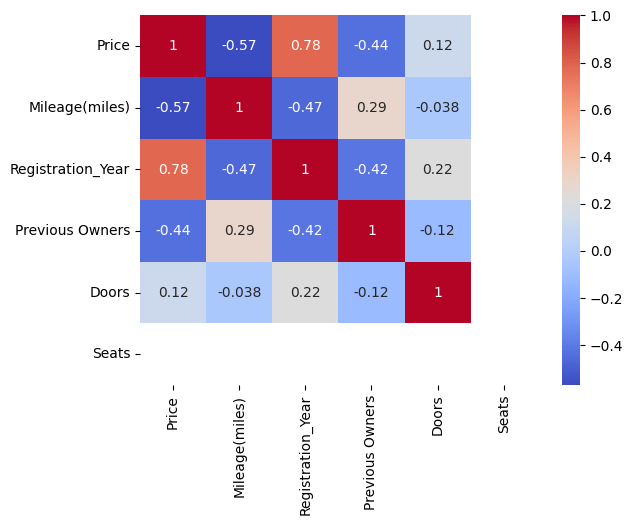

In [ ]:

#히트맵색으로 확인 : red (Posi),blue(Neg),whitw(none)
corr_matrix = merged.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [ ]:
#스케일러 : RobustScaler (중앙값 0 기준)
#이상치가 많을때
from sklearn.preprocessing import RobustScaler

num_cols = ['Price', 'Mileage(miles)', 'Registration_Year']
X = merged[num_cols]
robust_scaled = RobustScaler().fit_transform(X)
robust_df = pd.DataFrame(robust_scaled, columns=num_cols)
print("RobustScaler 결과:\n", robust_df.head())


RobustScaler 결과:
       Price  Mileage(miles)  Registration_Year
0  0.526794       -0.213208           0.533333
1 -0.455041        0.186566          -0.533333
2 -0.554223        1.238700          -0.133333
3 -0.291553        0.363591          -0.266667
4 -0.544959        0.108658           0.133333


In [ ]:
#스케일러 :  standardscaler(평균0, 표준편차1)
#데이터가 정규 분포에 가까울때
from sklearn.preprocessing import StandardScaler
num_cols = ['Price', 'Mileage(miles)', 'Registration_Year']
X = merged[num_cols]
std_scaled = StandardScaler().fit_transform(X)
standard_df = pd.DataFrame(std_scaled, columns=num_cols)

print("StandardScaler 결과:\n", standard_df.head(), "\n")

StandardScaler 결과:
       Price  Mileage(miles)  Registration_Year
0  0.287649       -0.306761           0.848589
1 -1.001640        0.226478          -0.805111
2 -1.131881        1.629869          -0.184973
3 -0.786958        0.462604          -0.391686
4 -1.119716        0.122561           0.228452 



In [ ]:
#스케일러: MinMaxScaler (0~1 사이로 조정)
#값의 범위를 0-1로 만들고 싶을때
num_cols = ['Price', 'Mileage(miles)', 'Registration_Year']
X = merged[num_cols]
minmax_scaled = MinMaxScaler().fit_transform(X)
minmax_df = pd.DataFrame(minmax_scaled, columns=num_cols)

print("MinMaxScaler 결과:\n", minmax_df.head())

In [ ]:
import matplotlib.pyplot as plt

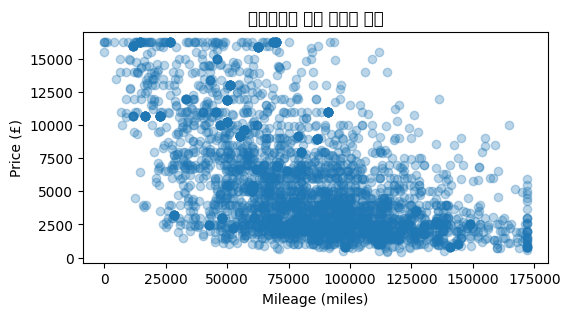

In [ ]:
#주행거리와 가격의 음의 관계 확인 (scatter plot-산점도)
#가설.주행거리가 많을 수록 가격이 낮다
plt.figure(figsize=(6,3)) #인치 단위 그래프 크기
plt.scatter(merged["Mileage(miles)"], merged["Price"], alpha=0.3)
plt.title("주행거리와 차량 가격의 관계")
plt.xlabel("Mileage (miles)")
plt.ylabel("Price (£)")
plt.show()


In [ ]:
#가설2. 나라별 생산된 차량의 평균 가격이 다를것이다
country_mean = merged.groupby("country")["Price"].mean().sort_values(ascending=False)
print("국가별 평균 차량 가격 (상위 10개)")
print(country_mean.head(10))

국가별 평균 차량 가격 (상위 10개)
country
Romania           7439.571429
Germany           7261.263615
South Korea       6225.390449
Czech Republic    5494.277778
France            5408.458812
United Kingdom    5341.793553
Japan             5248.890796
United States     4721.962415
Spain             4669.658333
Italy             4370.988281
Name: Price, dtype: float64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


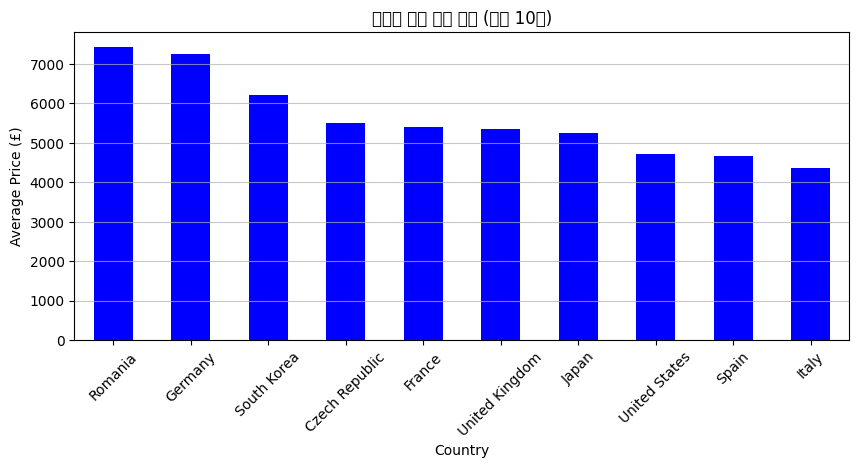

In [ ]:
plt.figure(figsize=(10, 4))
country_mean.head(10).plot(kind='bar', color='blue')
plt.title("국가별 평균 차량 가격 (상위 10개)")
plt.xlabel("Country")
plt.ylabel("Average Price (£)")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.show()

In [ ]:
#가설3.body type에 따라 차량 가격이 차이가 있다.
body_mean = merged.groupby("Body type")["Price"].mean().sort_values(ascending=False)
print(body_mean)

Body type
Pickup         12878.500000
SUV             8420.146421
Coupe           8247.845324
Saloon          6365.361413
Estate          5279.169591
Hatchback       5074.321711
Convertible     4394.660550
Minibus         4200.000000
MPV             4070.601307
Combi Van       3372.500000
Name: Price, dtype: float64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

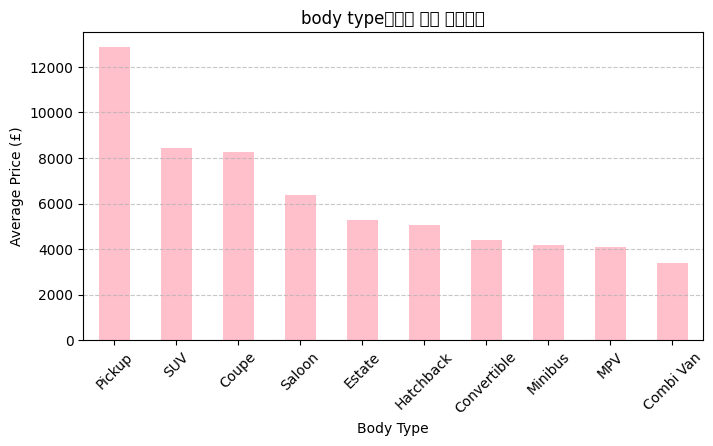

In [ ]:
plt.figure(figsize=(8,4))
body_mean.plot(kind='bar', color='pink')
plt.title("body type에따른 차량 가격차이")
plt.xlabel("Body Type")
plt.ylabel("Average Price (£)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()